# Graphs

<div style="font-size: 20px"><b>A graph is a collection of vertices (also called nodes) that are connected via edges (or branches)</b></div>

<!-- 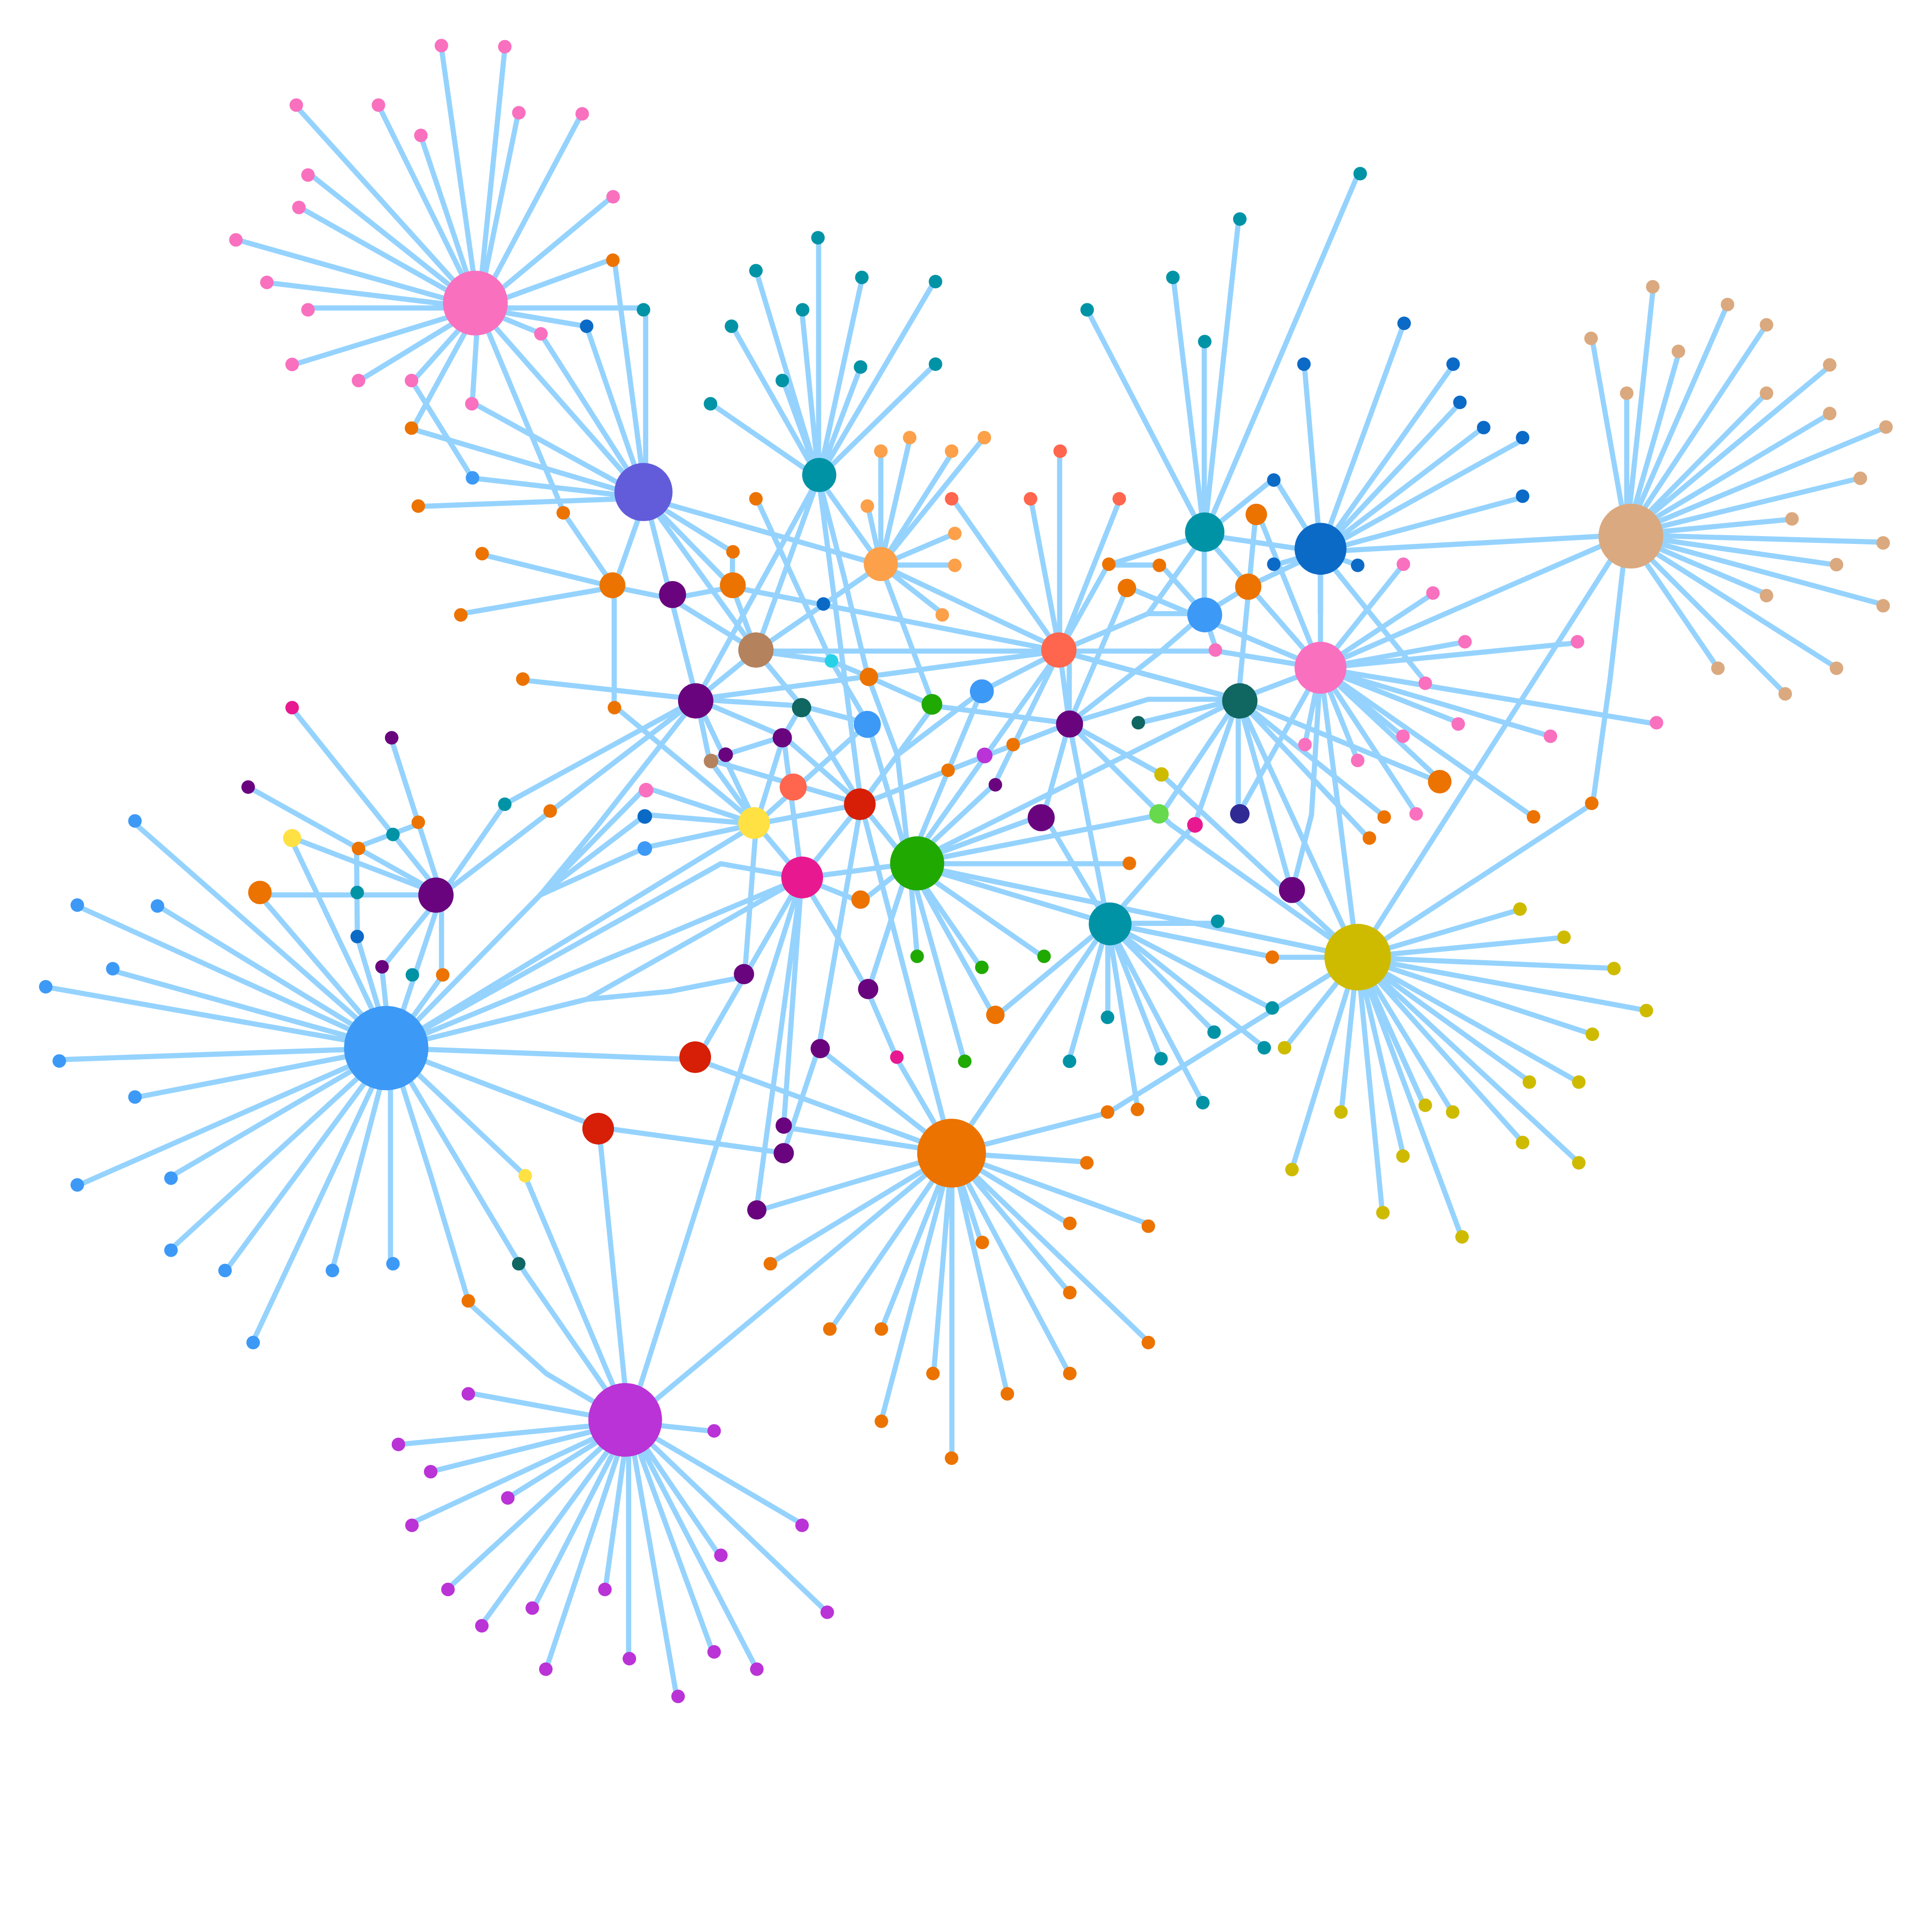 -->
<div> 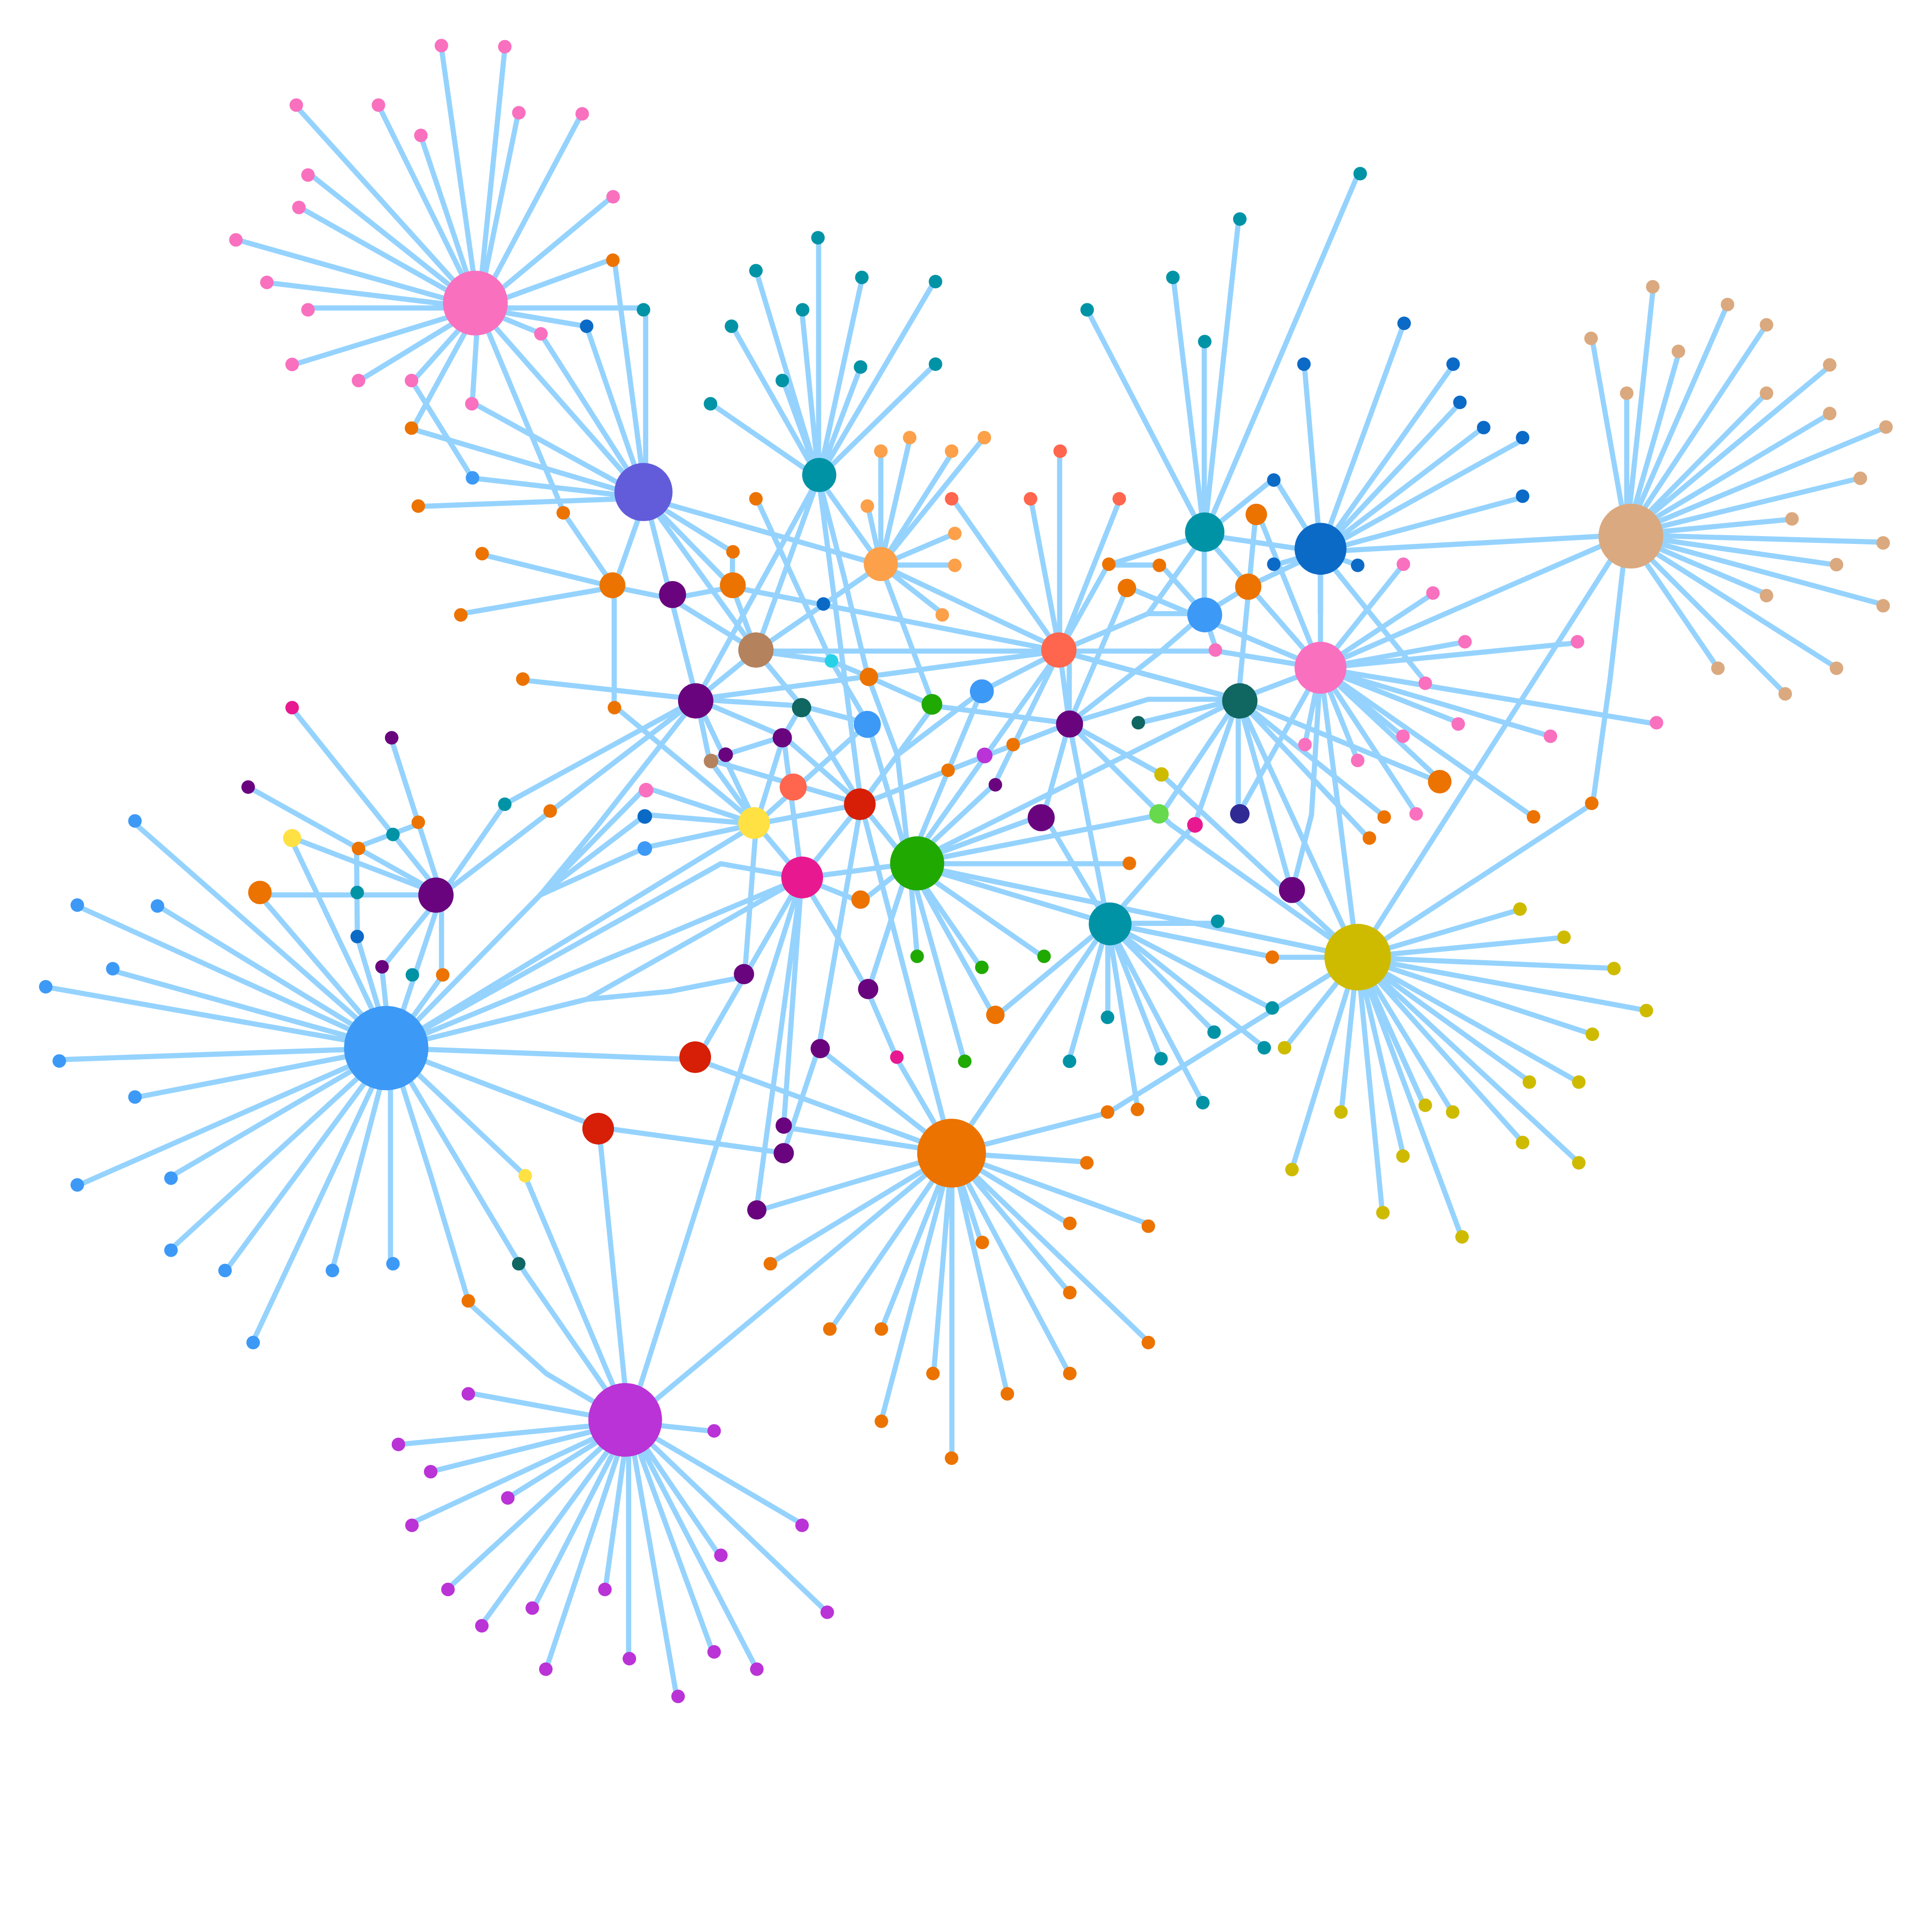 </div>

<div style="font-size: 15px">Formally, a graph G consists of a set of V vertices (or nodes) and a set of E edges such that each edge e $\in$ E connects two vertices v∈V. A graph G with vertices V and edges E is written as G=(V,E)

<b>Directed vs Undirected Graphs</b>

A undirected graph means that the relationship along an edge between two nodes is bidirectional, i.e. it can go either way. A directed graph means that the relationship only goes one way    
</div>

# Representation of Graphs

<div style="font-size: 15px">
There are two standard ways of representing a graph: the <b>adjacency list</b> and the <b>adjacency matrix</b> implementation. Essentially we want to do the following for graphs
<br></br>   

<code>
nodes(): Returns all the nodes of the graph
edges(): Returns all the edges of a graph
insert_node(value, x): Inserts a node of value v which as a neighbor of x
remove_node(node): Removes the given node of the graph
</code>

## Adjacency List Implementation

In [36]:
class Graph:
    def __init__(self,size):
        '''initiates graph with num vertices = size'''
        self.size = size
        self.vertices = [[] for i in range(size)]
        
    def add_edge(self,i,j):
        '''Adds edge between nodes `i` and `j`'''
        if not (i in self.vertices[j]): # not (i in self.vertices[j]) => not (j in self.vertices[i])
            self.vertices[j].append(i)
            self.vertices[i].append(j)
    
    @property # property decorator: defined as function but actually an attribute/property      
    def num_edges(self):
        count = 0
        for i in range(self.size):
            count = count + len(self.vertices[i])
        return int(count/2)

In [37]:
x = Graph(5)

In [38]:
x.add_edge(1,2)
x.add_edge(0,1)
x.add_edge(0,4)
x.add_edge(3,2)
x.add_edge(4,2)

x.vertices

[[1, 4], [2, 0], [1, 3, 4], [2], [0, 2]]

In [40]:
x.num_edges

5

A common way to implement a graph using an adjacency list is to use either a hashtable with an array as values or use a hashtable with linked lists as a value. Since Python combines the idea of arrays and linked lists, we can easily implement this representation using a dictionary with nodes as keys and a list as a value.

In [19]:
# Node Object
class Node(object):
    '''A Node object contains 
    1) An id to identify the Node
    2) A dictionary with connected Nodes'(neighbours') ids as keys & the edgeweights 
        between the node and its neighbours as values''' 
    
    def __init__(self,key):
        '''Two attributes: id and neighbours'''
        self.id = key
        self.neighbours = {}
        
    def addNeighbour(self,neighbour,weight=0):
        '''stores the neighbour's key in own `neighbours` dict-key and the weight in dict-value, Also,
        stores the own key in neighbour's `neighbours` dict-key and the weight in dict-value'''
        if neighbour.id != self.id: 
            self.neighbours[neighbour.id] = weight
            neighbour.neighbours[self.id] = weight
        '''Neighbourhood is a symmtric relationship'''
        else: print(f'Node {self.id} cannot be its own neighbour...Ignoring!!!')
            
    def removeNeighbour(self,neighbour):
        if neighbour in self.neighbours:
            del self.neighbours[neighbour]
            
    def isConnected(self,neighbour):
        if neighbour in self.neighbours: 
            return True
        return False
        
    def getNeighbours(self):
        return self.neighbours
    
    def getId(self):
        return self.id
    
    def getWeight(self, neighbour_id):
        return self.neighbours[neighbour_id]
    
    def __str__(self):
        return str(self.id)
    def __repr__(self):
        return str(self.neighbours)

In [20]:
x = Node(2)

__NOTE THE FOLLOWING CELL__

In [21]:
a = Node(3)
b = Node(3)

a==b

False

In [24]:
x.addNeighbour(Node(3), 2)
# x.addNeighbour(1, 2)

In [25]:
x.getNeighbours()

{3: 2}

In [26]:
# Graph Object
class Graph(object):
    
    def __init__(self):
        '''Graph is just a collection of Vertices(V) and Edges(E): G = (V, E)
        Node objects contain info about V & E. So, our Graph object is just a collection of those Nodes'''
        self.ListOfNodes = {} # dict: key-> Node object id, Value Node Object (2 attributes id & neighbours)
    
    def addVertex(self, key):
        '''Adds a vertex with specified key(id) to the ListOfNodes.'''
        newVertex = Node(key)
        self.ListOfNodes[key] = newVertex
        return newVertex
    
    def getVertex(self, key):
        if key in self.ListOfNodes: return self.ListOfNodes[key]
        else: print(f"No vertex with id {key}")
    
    def addEdge(self, from_key, to_key, weight=0): 
        if from_key not in self.ListOfNodes:   self.addVertex(from_key)
        if to_key   not in self.ListOfNodes:   self.addVertex(to_key)
        
        
        self.ListOfNodes[from_key].addNeighbour(self.ListOfNodes[to_key], weight)
        
    def getVertices(self):
        return self.ListOfNodes.keys()
    
    def __iter__(self):
        # this sepcial function allows us to iterate through master list
        return iter(self.ListOfNodes.keys())
    
    def __contains__(self,n):
        # this special function allows us to use IN operator
        if n in self.ListOfNodes:
            return True
        else:
            return False

In [7]:
if __name__ == '__main__':
    g = Graph()
    for i in range(6):
        g.addVertex(i)
    
    g.addEdge(0,1,5)
    g.addEdge(3,1,3)
    g.addEdge(2,5,6)
    g.addEdge(2,1,3)
    g.addEdge(0,4,2)
    # iteration through the master list
    for vert in g:
        print(vert)

0
1
2
3
4
5


In [8]:
g.ListOfNodes

{0: {1: 5, 4: 2},
 1: {0: 5, 3: 3, 2: 3},
 2: {5: 6, 1: 3},
 3: {1: 3},
 4: {0: 2},
 5: {2: 6}}

<div style="font-size: 15px">
    <b> Tree</b>
    
Formally, a tree is a graph in which any two vertices are connected by exactly one path. In other words, in order to be a tree, we can't have a loop (or cycle), where we can start from a particular vertex, follow a path of different, but connected branches and return to the same vertex.

The following, is an example of a tree:</div> 

<div> 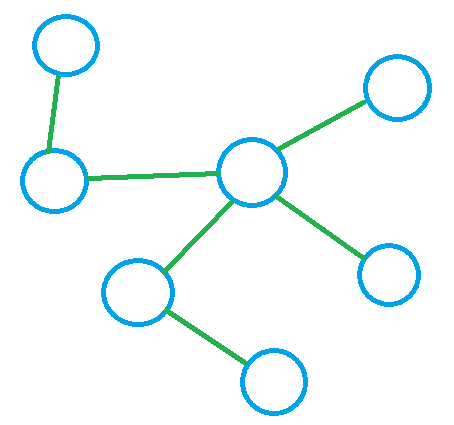 </div>

# Breadth First Search

Breadth-first search (BFS) is an important graph search algorithm that is used to solve many problems including finding the shortest path in a graph and solving puzzle games (such as Rubik's Cubes). 

Many problems in computer science can be thought of in terms of graphs. For example, analyzing networks, mapping routes, and scheduling are graph problems. Graph search algorithms like breadth-first search are useful for analyzing and solving graph problems.

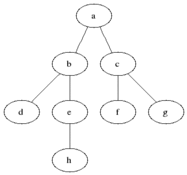

```Python
BFS(v):
    Q = Queue()
    Q.add(v)
    visited = set()
    visted.add(v) #Include v in the set of elements already visited
    while (not IsEmpty(Q)): 
        w = Q.dequeue() #Remove a single element from Q and store it in w
        for u in w.vertices(): #Go through every node w is adjacent to. 
            if (not u in visited): #Only do something if u hasn't already been visited
                visited.add(u) 
                Q.add(u)
```

In [1]:
class Graph:
    def __init__(self,size):
        self.size = size
        self.vertices = [[] for i in range(size)]
    def add_edge(self,i,j):
        if not (i in self.vertices[j]):
            self.vertices[j].append(i)
            self.vertices[i].append(j)

Complete the following code for determining if there is a path from vertex _i_ to vertex _j_ in **two edges**:

In [ ]:
#  Let g be a graph in the format above and i and j be two vertices.
def exists_two_path(g,i,j):
    for neighbor in g.vertices[i]:
        if neighbor in g.vertices[j]:
            return True
    return False

Any algorithm that expands out by distance from a point instead of diving deep into one path away from our source node is using breadth first search. But is it effective?

Well it depends on your circumstances.

It is effective if you are trying to solve a problem where you are trying to find the smallest number of connections between two things, for example:

* Minimum number of friend connections between two people on Facebook
* Navigation - finding the shortest distance from point A to point B given a set of interconnected roads

However, it won't be ideal for problems where you know there will only be one solution which will be found at one of the leaves, for example:

* Solving a maze
* Solving a Sudoku

For these types of applications we would want to dive deep into the tree, all the way to the bottom, early on, and then try another route, and for this, a __depth first search (DFS)__ would be more efficient.

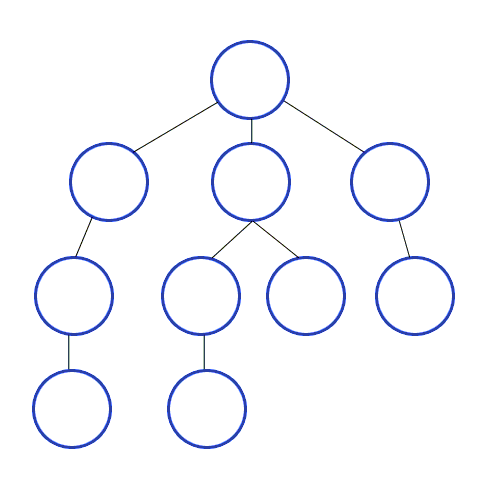